In [23]:
# Imports 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [24]:
# read csv file gas_price_data.csv
df = pd.read_csv('gas_price_data.csv', index_col=0)

# Adjust the date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

df.head()

,Date,Regular,Diesel
0,2022-08-29,3.85,5.06
1,2022-09-05,3.79,5.07
2,2022-09-12,3.72,5.01
3,2022-09-19,3.68,4.95
4,2022-09-26,3.73,4.90


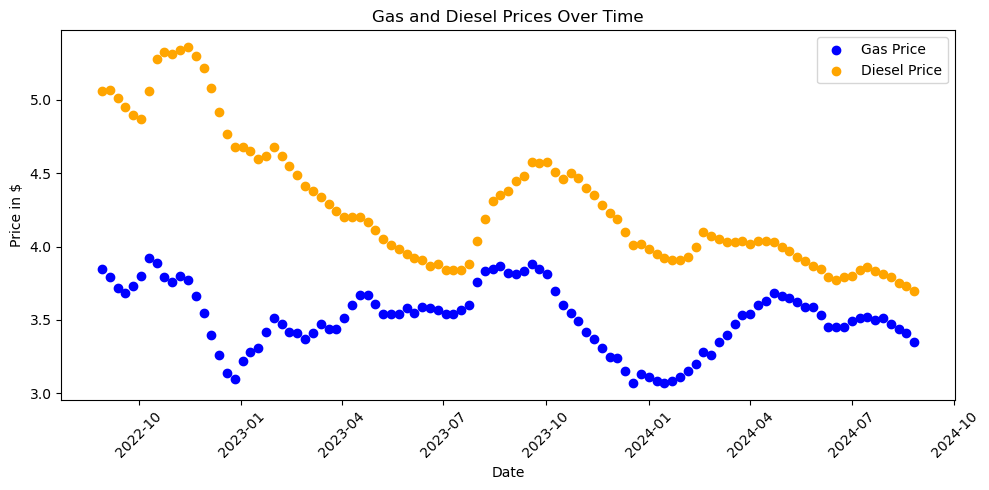

In [25]:
# plot the price data 
plt.figure(figsize=(10, 5))
plt.scatter(df['Date'], df['Regular'], label='Gas Price', color='blue')
plt.scatter(df['Date'], df['Diesel'], label='Diesel Price', color='orange')
plt.title('Gas and Diesel Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price in $')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


What type of function could we fit to this dataset? What trends do you want to capture? 
* Linear 
* Exponential (decreasing)
* Degree 6/7 polynomial

# Linear Fit 

In [26]:
X = df.index
y_regular = df['Regular']
y_diesel = df['Diesel']

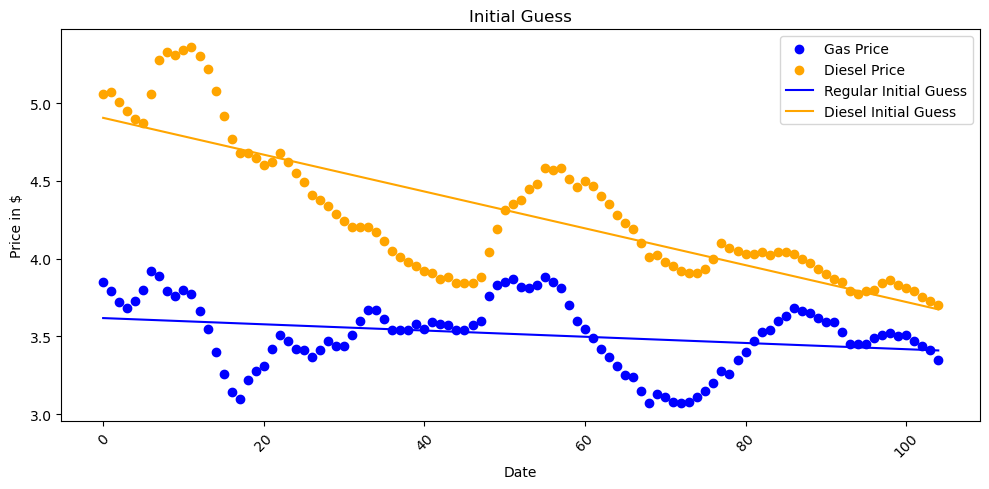

In [27]:
m_regular, b_regular = np.polyfit(X, y_regular, 1)
m_diesel, b_diesel = np.polyfit(X, y_diesel, 1)

# plot the price data 
plt.figure(figsize=(10, 5))
plt.scatter(X, df['Regular'], label='Gas Price', color='blue')
plt.scatter(X, df['Diesel'], label='Diesel Price', color='orange')
plt.plot(X, m_regular * X + b_regular, "b-", label="Regular Initial Guess")
plt.plot(X, m_diesel * X + b_diesel, "orange", label="Diesel Initial Guess")
plt.title('Initial Guess')
plt.xlabel('Date')
plt.ylabel('Price in $')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

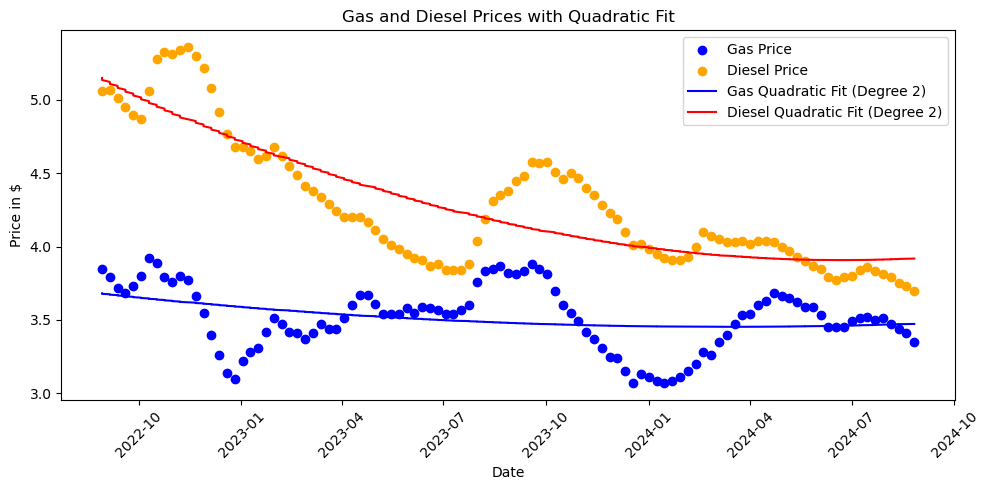

Regular Gas Quadratic Coefficients (Degree 2): [ 3.53121591e-05 -5.67381226e-03  3.68044739e+00]
Diesel Quadratic Coefficients (Degree 2): [ 1.36936707e-04 -2.60837356e-02  5.14970678e+00]


In [28]:
coeffs_regular = np.polyfit(X, y_regular, 2)
coeffs_diesel = np.polyfit(X, y_diesel, 2)


poly_regular = np.poly1d(coeffs_regular)
poly_diesel = np.poly1d(coeffs_diesel)


X_smooth = np.linspace(X.min(), X.max(), 200)  


plt.figure(figsize=(10, 5))
plt.scatter(df['Date'], df['Regular'], label='Gas Price', color='blue')
plt.scatter(df['Date'], df['Diesel'], label='Diesel Price', color='orange')
plt.plot(df['Date'][X_smooth.astype(int)], poly_regular(X_smooth), "b-", label="Gas Quadratic Fit (Degree 2)")
plt.plot(df['Date'][X_smooth.astype(int)], poly_diesel(X_smooth), "r-", label="Diesel Quadratic Fit (Degree 2)")
plt.title('Gas and Diesel Prices with Quadratic Fit')
plt.xlabel('Date')
plt.ylabel('Price in $')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


print("Regular Gas Quadratic Coefficients (Degree 2):", coeffs_regular)
print("Diesel Quadratic Coefficients (Degree 2):", coeffs_diesel)

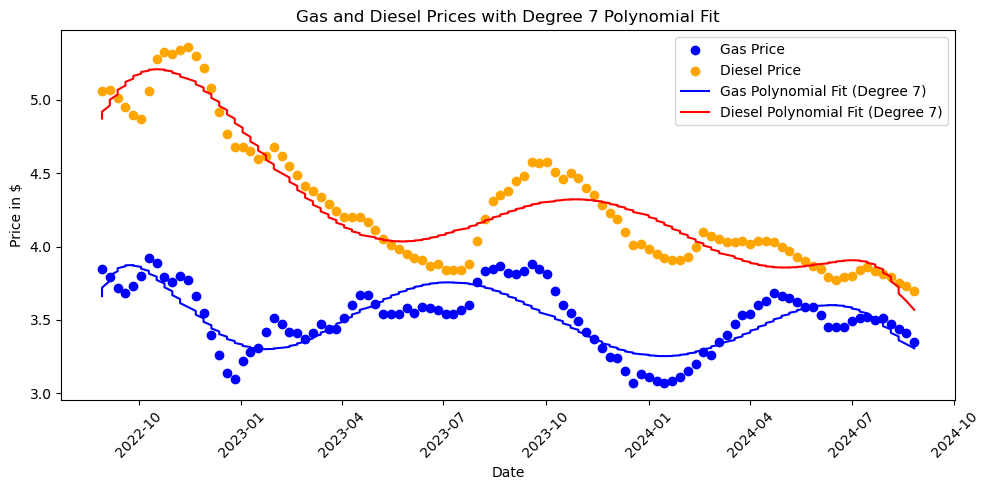

Regular Gas Polynomial Coefficients (Degree 7): [ 5.71091231e-12 -2.32782540e-09  3.71174976e-07 -2.91302979e-05
  1.15538807e-03 -2.09535815e-02  1.19899166e-01  3.66249914e+00]
Diesel Polynomial Coefficients (Degree 7): [-4.39332889e-12  1.39781146e-09 -1.58774421e-07  6.91523746e-06
 -6.49307181e-06 -6.60082302e-03  9.22791457e-02  4.87278566e+00]


In [29]:
coeffs_regular = np.polyfit(X, y_regular, 7)
coeffs_diesel = np.polyfit(X, y_diesel, 7)


poly_regular = np.poly1d(coeffs_regular)
poly_diesel = np.poly1d(coeffs_diesel)


X_smooth = np.linspace(X.min(), X.max(), 200)  


plt.figure(figsize=(10, 5))
plt.scatter(df['Date'], df['Regular'], label='Gas Price', color='blue')
plt.scatter(df['Date'], df['Diesel'], label='Diesel Price', color='orange')
plt.plot(df['Date'][X_smooth.astype(int)], poly_regular(X_smooth), "b-", label="Gas Polynomial Fit (Degree 7)")
plt.plot(df['Date'][X_smooth.astype(int)], poly_diesel(X_smooth), "r-", label="Diesel Polynomial Fit (Degree 7)")
plt.title('Gas and Diesel Prices with Degree 7 Polynomial Fit')
plt.xlabel('Date')
plt.ylabel('Price in $')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


print("Regular Gas Polynomial Coefficients (Degree 7):", coeffs_regular)
print("Diesel Polynomial Coefficients (Degree 7):", coeffs_diesel)

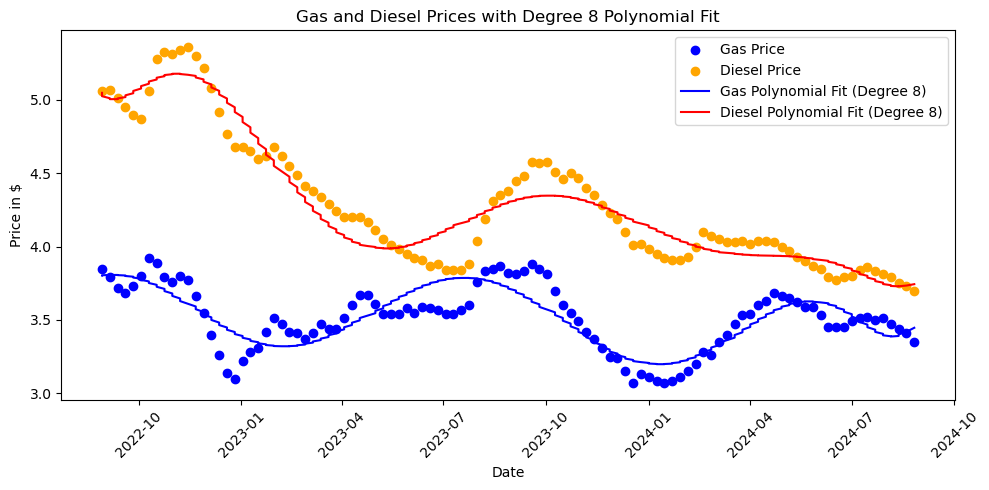

Regular Gas Polynomial Coefficients (Degree 8): [ 1.73450206e-13 -6.64443733e-11  9.91357320e-09 -7.16630894e-07
  2.49243613e-05 -3.26473064e-04 -4.06968964e-04  3.88215674e-03
  3.80246476e+00]
Diesel Polynomial Coefficients (Degree 8): [ 2.17314482e-13 -9.47961535e-11  1.67349694e-08 -1.52167836e-06
  7.46399209e-05 -1.86310594e-03  1.91418762e-02 -5.30777083e-02
  5.04814756e+00]


In [ ]:
coeffs_regular = np.polyfit(X, y_regular, 8)
coeffs_diesel = np.polyfit(X, y_diesel, 8)


poly_regular = np.poly1d(coeffs_regular)
poly_diesel = np.poly1d(coeffs_diesel)


X_smooth = np.linspace(X.min(), X.max(), 200)  


plt.figure(figsize=(10, 5))
plt.scatter(df['Date'], df['Regular'], label='Gas Price', color='blue')
plt.scatter(df['Date'], df['Diesel'], label='Diesel Price', color='orange')
plt.plot(df['Date'][X_smooth.astype(int)], poly_regular(X_smooth), "b-", label="Gas Polynomial Fit (Degree 8)")
plt.plot(df['Date'][X_smooth.astype(int)], poly_diesel(X_smooth), "r-", label="Diesel Polynomial Fit (Degree 8)")
plt.title('Gas and Diesel Prices with Degree 8 Polynomial Fit')
plt.xlabel('Date')
plt.ylabel('Price in $')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
print("Regular Gas Polynomial Coefficients (Degree 8):", coeffs_regular)
print("Diesel Polynomial Coefficients (Degree 8):", coeffs_diesel)